In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('Diabetes.csv')

In [3]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
d=data.loc[(data['Glucose']!=0) & (data['BloodPressure']!=0) &
          (data['SkinThickness']!=0) & (data['Insulin']!=0) & (data['BMI']!=0)]

In [8]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [10]:
data['Glucose'].replace(0,d['Glucose'].mean(),inplace=True)
data['BloodPressure'].replace(0,d['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].replace(0,d['SkinThickness'].mean(),inplace=True)
data['Insulin'].replace(0,d['Insulin'].mean(),inplace=True)
data['BMI'].replace(0,d['BMI'].mean(),inplace=True)

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127849,0.208850,0.082926,0.056535,0.021589,-0.033523,0.544341,0.221898
Glucose,0.127849,1.000000,0.219028,0.192985,0.419998,0.230189,0.137004,0.266453,0.492948
BloodPressure,0.208850,0.219028,1.000000,0.192796,0.072908,0.281531,-0.001108,0.325860,0.164509
SkinThickness,0.082926,0.192985,0.192796,1.000000,0.158154,0.542239,0.101030,0.127780,0.215277
Insulin,0.056535,0.419998,0.072908,0.158154,1.000000,0.166212,0.098136,0.137366,0.214532
BMI,0.021589,0.230189,0.281531,0.542239,0.166212,1.000000,0.153238,0.025207,0.311446
DiabetesPedigreeFunction,-0.033523,0.137004,-0.001108,0.101030,0.098136,0.153238,1.000000,0.033561,0.173844
Age,0.544341,0.266453,0.325860,0.127780,0.137366,0.025207,0.033561,1.000000,0.238356
Outcome,0.221898,0.492948,0.164509,0.215277,0.214532,0.311446,0.173844,0.238356,1.000000


In [13]:
x=data.iloc[:,0:8]

In [14]:
y=data.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [17]:
lr.fit(x_train,y_train)

C:\Users\91829\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=lr.predict(x_test)

In [20]:
print("Predicted Values:")
print(y_pred)
print("Actual Values:")
print(y_test)

Predicted Values:
[1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
Actual Values:
661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64


In [21]:
cf=confusion_matrix(y_test,y_pred)
print(cf)
print("Classification Report for Testing Dataset:")
print(classification_report(y_test,y_pred))

[[94 13]
 [18 29]]
Classification Report for Testing Dataset:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



In [22]:
y_train_pred=lr.predict(x_train)

In [23]:
print("Classification Report for Training Dataset:")
print(classification_report(y_train,y_train_pred))

Classification Report for Training Dataset:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       393
           1       0.73      0.57      0.64       221

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.73       614
weighted avg       0.76      0.77      0.76       614



<AxesSubplot:>

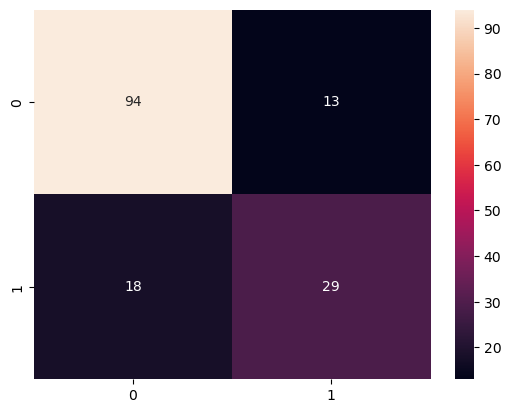

In [24]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

In [25]:
print(lr.intercept_)

[-6.73785209]


In [26]:
print(lr.coef_)

[[ 8.30491521e-02  3.55368905e-02 -2.45017676e-02 -9.26682967e-03
  -1.21949268e-03  6.97487412e-02  1.81413343e+00  1.49189775e-02]]


In [27]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn import model_selection
kfold = KFold(n_splits=5)
cv_results = model_selection.cross_val_score(lr, x, y, cv=kfold)

C:\Users\91829\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91829\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [28]:
cv_results

array([0.77272727, 0.74025974, 0.77922078, 0.83006536, 0.76470588])

In [29]:
cv_results.mean()

0.7773958068075715

In [30]:
import pickle
f=open("diabetes_pred_model.pkl", "wb")  

pickle.dump(lr, f) 
f.close()